In [ ]:
#import necessary libraries
import pandas as pd
from Bio.Seq import Seq
from Bio import SeqIO

#open the GenBank file
handle = open("BKV GenBank.gb")
records = list(SeqIO.parse(handle, "genbank"))

#create an empty list to store the data
data = []

#extract the data from the GenBank file
for record in records:
    for feature in record.features:
        if feature.type == "CDS":
            protein_seq = feature.qualifiers.get("translation", "N/A")[0]
            gene_name = feature.qualifiers.get("product","N/A")[0]
            #append the data to the list
            data.append([record.id, gene_name, protein_seq])

#create a pandas DataFrame from the list
df = pd.DataFrame(data, columns=["Virus Strain Name", "Gene Name", "Protein Sequence"])

#export the DataFrame to an excel file
df.to_excel("BKV strains_protein sequences.xlsx", index = False)

In [ ]:
import pandas as pd
import re
 
# Read both Excel files into dataframes
epitope_df = pd.read_excel('BKV scored epitopes.xlsx')
strain_df = pd.read_excel('BKV strains_protein sequences.xlsx')
 
# Initialize a new dataframe to store the results
results_df = pd.DataFrame(columns=['Epitope', 'Gene', 'Strain'])
 
# Iterate over the protein sequences in the second file
for _, row in strain_df.iterrows():
    protein_sequence = row['Protein Sequence']
    gene = row['Gene Name']
    strain = row['Virus Strain Name']
 
    # Iterate over the epitopes in the first file
    for _, epitope in epitope_df.iterrows():
        epitope_name = epitope['Epitopes']
 
        # Use a regular expression to search for the epitope in the protein sequence
        if re.search(epitope_name, protein_sequence):
            results_df = results_df.append({'Epitope': epitope_name, 'Gene': gene, 'Strain': strain}, ignore_index=True)
 
# Export the results to a new Excel file
results_df.to_excel('results_BKV scored epitopes.xlsx', index=False)

In [ ]:
import pandas as pd
import seaborn as sns

# Read the data into a dataframe
results_df = pd.read_excel('results_BKV scored epitopes.xlsx')

# Create a pivot table using the 'Epitope' and 'Strain' columns as the rows and columns of the table, and the count of the 'Epitope' column as the values of the table.
pivot_table = pd.pivot_table(results_df, 
                             index='Epitope', 
                             columns='Strain', 
                             values='Epitope', 
                             aggfunc=len,
                             fill_value=0)

# Print the pivot table
print(pivot_table)

# Use the to_excel method to save the pivot table to an excel sheet
pivot_table.to_excel('pivot_table_BKV scored epitopes.xlsx', index=True)

In [8]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile


df = pd.read_excel('% conservation of scored epitopes.xlsx')

df['percentage'] = df.apply(lambda x: x.count()/len(df), axis=1)

#print(df)

print(df['percentage'])

0     7.254545
1     7.236364
2     7.236364
3     7.236364
4     7.236364
5     7.236364
6     7.236364
7     7.236364
8     7.236364
9     7.236364
10    7.236364
11    7.236364
12    7.236364
13    7.236364
14    7.236364
15    7.236364
16    7.236364
17    7.236364
18    7.236364
19    7.236364
20    7.236364
21    7.236364
22    7.236364
23    7.236364
24    7.236364
25    7.236364
26    7.236364
27    7.236364
28    7.236364
29    7.236364
30    7.236364
31    7.236364
32    7.236364
33    7.236364
34    7.236364
35    7.236364
36    7.236364
37    7.236364
38    7.236364
39    7.236364
40    7.236364
41    7.236364
42    7.236364
43    7.236364
44    7.236364
45    7.236364
46    7.236364
47    7.236364
48    7.236364
49    7.236364
50    7.236364
51    7.236364
52    7.236364
53    7.236364
54    7.236364
Name: percentage, dtype: float64


In [10]:
print(df['Percentage'])

0     99.240506
1     98.987342
2     98.987342
3     98.987342
4     95.443038
5     99.240506
6     99.240506
7     99.240506
8     98.734177
9     99.240506
10    99.240506
11    95.443038
12    99.240506
13    98.987342
14    99.240506
15    98.987342
16    74.683544
17    70.886076
18    99.240506
19    99.240506
20    99.240506
21    98.987342
22    98.987342
23    99.240506
24    99.240506
25    99.240506
26    99.240506
27    99.240506
28    99.240506
29    98.987342
30    94.936709
31    98.987342
32    98.987342
33    95.189873
34    96.708861
35    94.936709
36    98.734177
37    98.734177
38    98.987342
39    98.481013
40    99.240506
41    99.493671
42    96.708861
43    99.240506
44    99.493671
45    99.493671
46    99.493671
47    99.493671
48    99.493671
49    99.493671
50    99.493671
51    70.379747
52    99.240506
53    99.240506
54    99.240506
Name: Percentage, dtype: float64


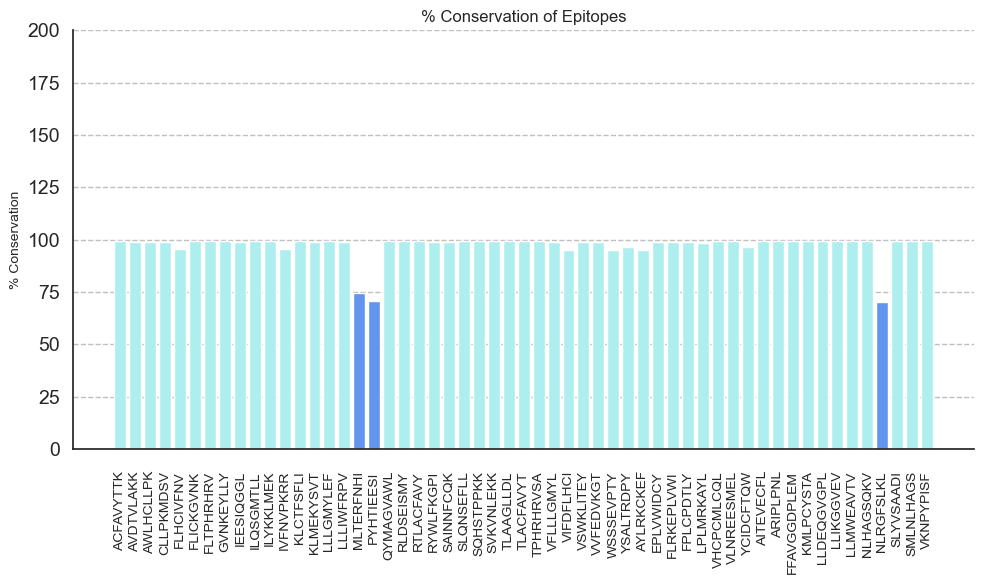

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Set the figure size and font size
plt.figure(figsize=(10, 6))
fontsize = 10

# Plot the data using seaborn
for i in range(len(df['Percentage'])):
    if df['Percentage'][i] <= 50:
        plt.bar(i, df['Percentage'][i], color='navy')
    elif df['Percentage'][i] > 50 and df['Percentage'][i] <= 90:
        plt.bar(i, df['Percentage'][i], color='cornflowerblue')
    else:
        plt.bar(i, df['Percentage'][i], color='paleturquoise')

# Add vertical lines between bars
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.5)

# Set the x-tick labels to the epitope names
plt.xticks(range(len(df['Epitope'])), df['Epitope'], rotation=90, fontsize=10)

# Set the padding between the x-axis labels and the tick marks
plt.tick_params(axis='x', which='major', pad=10)

# Remove the x-axis label
plt.xlabel('')

# Set the y-axis label and font size
plt.ylabel('% Conservation', fontsize=fontsize)

# Set the title and font size
plt.title("% Conservation of Epitopes", fontsize=fontsize+2)

# Remove the top and right spines
sns.despine(top=True, right=True)

# Set the y-axis limits
plt.ylim(0, 200)

# Set the tick label font size
plt.yticks(fontsize=14)

# Save the figure as an image
plt.savefig('conservation.png', dpi=300, bbox_inches='tight')

plt.tight_layout()

# Show the plot
plt.show()